In [1]:
import cv2
import scipy
import skimage
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
%matplotlib inline

In [96]:
base_img_path = r'./imagens/'
filepath = os.path.join(base_img_path, 'img0.pgm')
img = cv2.imread(filepath, 0)

In [97]:
img.shape

(400, 400)

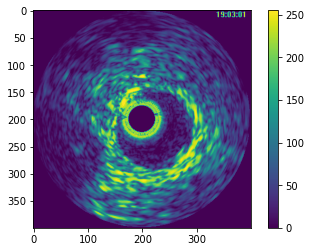

In [98]:
plt.imshow(img, cmap='viridis')
plt.colorbar()

In [99]:
mask = img < 50

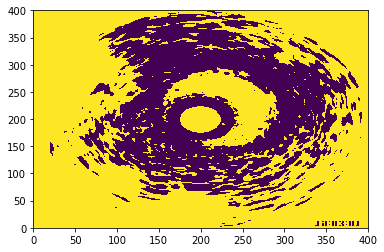

In [100]:

plt.pcolormesh(mask)

In [101]:
np.shape(mask)

(400, 400)

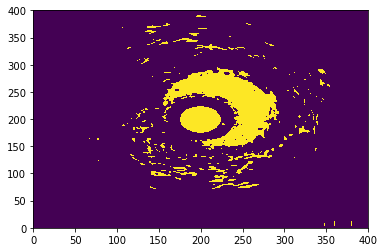

In [102]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask)

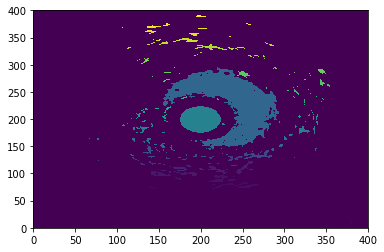

In [103]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask_labeled)

In [109]:
slc = mask_labeled[170]
rps = regionprops(mask_labeled)
areas = [rp.area for rp in rps]
idxs = np.argsort(areas)

In [110]:
new_slc = np.zeros_like(mask_labeled)

In [111]:
for i in idxs[:3]:
    new_slc[mask_labeled == i] = i+1

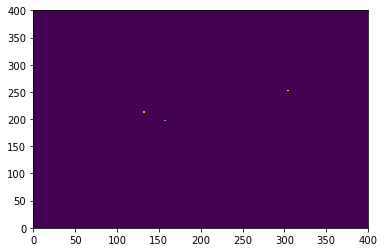

: 

In [112]:
plt.pcolormesh(new_slc)